# Sentiment Analysis

In [1]:
#importing req packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from warnings import filterwarnings  #to igonre warnings 
filterwarnings("ignore")



In [2]:
!pip install textblob  #installing textblob package for text analysis 

ERROR: Invalid requirement: '#installing'


In [3]:
!pip install wordcloud #installing wordcloud 

In [15]:
from wordcloud import WordCloud ,STOPWORDS
from textblob import TextBlob

In [4]:
#importing the data

videos=pd.read_csv('USvideos.csv',error_bad_lines=False)
videos

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0     XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1     K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2     cLdxuaxaQwc                                        My Response   
3     WYYvHb03Eog                          Apple iPhone X first look   
4     sjlHnJvXdQs                                  iPhone X (parody)   
...           ...                                                ...   
7987  xlu6i6lT_vk                     How Do MASSIVE Sinkholes Form?   
7988  qRoVlH1OcI4  Trump slams Clinton for defending NFL anthem p...   
7989  EoejGgUNmVU  LP - Lost On You (A Night at The McKittrick Ho...   
7990  MT1CMTI0EVw  Tré Melvin @ #YouTubeBlack FanFest Washington ...   
7991  AFxLA3RGjnc  First cosmic event seen in gravitational waves...   

                    channel_title  category_id  \
0                Logan Paul Vlogs           24   
1                           Apple           28   
2                       PewDiePie           22   
3                       The Verge           28   
4                      jacksfilms           23   
...                           ...          ...   
7987                  Life Noggin           27   
7988             Business Insider           25   
7989                           LP           10   
7990              YouTube FanFest           24   
7991  National Science Foundation           28   

                                                   tags    views   likes  \
0     logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1     Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                                [none]  5845909  576597   
3     apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4     jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   
...                                                 ...      ...     ...   
7987  sinkhole|how do sinkholes form|sinkhole in wat...   440393   14362   
7988  Business Insider|Donald Trump|Hillary Clinton|...    55762    1265   
7989  LP|Death Valley|Other People|Lost On You|The M...   142908    7088   
7990  YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...    24532    2148   
7991  LIGO|Virgo|collaboration|space|science|nationa...   144039    1574   

      dislikes  comment_total                                  thumbnail_link  \
0         5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1        26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2        39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3         4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4          568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
...        ...            ...                                             ...   
7987       390           1575  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg   
7988       760           1873  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg   
7989        68            437  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg   
7990        77              0  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg   
7991        59              0  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg   

       date  
0     13.09  
1     13.09  
2     13.09  
3     13.09  
4     13.09  
...     ...  
7987  22.10  
7988  22.10  
7989  22.10  
7990  22.10  
7991  22.10  

[7992 rows x 11 columns]

In [5]:
comments=pd.read_csv('UScomments.csv',error_bad_lines=False)
comments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691400 rows x 4 columns]

# Performing Sentimente Analysis 

In [6]:
TextBlob('Say hi to Kong and maverick for me').sentiment.polarity

0.0

In [7]:
#we creat a sting which check polartiy of all comment one by one and put it in a list 

polarity=[]
for i in comments["comment_text"]:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)



In [8]:
comments["polarity"]=polarity


In [9]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [16]:
comments_positive=comments[comments["polarity"]==1]
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

(-0.5, 1999.5, 999.5, -0.5)

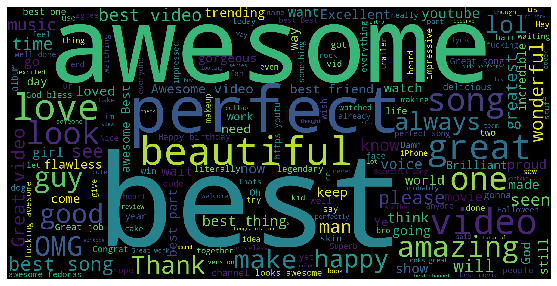

In [21]:
# creating Wordcloud 

total_comments=(" ".join(comments_positive["comment_text"]))
wordcloud = WordCloud(width = 2000, height = 1000,stopwords=stopwords).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud) #to see wordclod 
plt.axis('off') #to turn of the axis

# To do negative sentiment analysis


In [18]:
comments_neg=comments[comments["polarity"]==-1]
comments_neg.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [19]:
stopwords=set(STOPWORDS)

(-0.5, 1999.5, 999.5, -0.5)

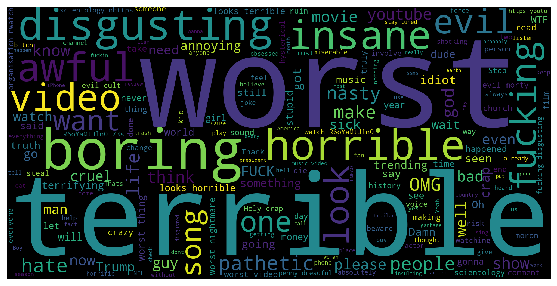

In [20]:
# creating Wordcloud 

total_comments=(" ".join(comments_neg["comment_text"]))
wordcloud = WordCloud(width = 2000, height = 1000,stopwords=stopwords).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud) #to see wordclod 
plt.axis('off') #to turn of the axis 

# Text analysis

In [22]:
# Analysing Tags column,what are trending tags on youtube

tags=(" ".join(videos["tags"]))
tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [24]:
#removing the unessasary things from comments

import re

In [25]:
clear_tags=re.sub('[^a-zA-Z]'," ",tags)

In [26]:
clear_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [27]:
#as we see all other pancuations and symbols wears removed 
#del extra spaces 
clear_tags=re.sub(' +'," ",clear_tags)
clear_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

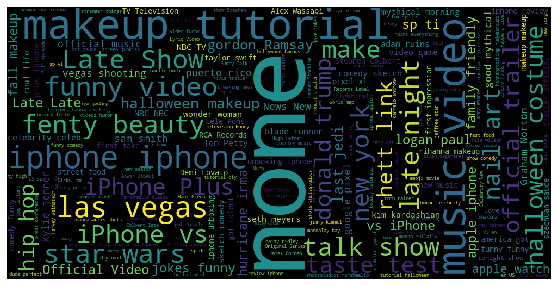

In [28]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=set(STOPWORDS)).generate(tags)# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# find regression between some variables


TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

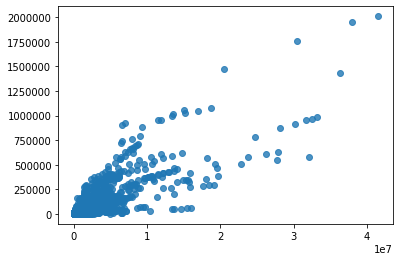

In [29]:
sns.regplot(x="views",y="likes",data=videos)

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

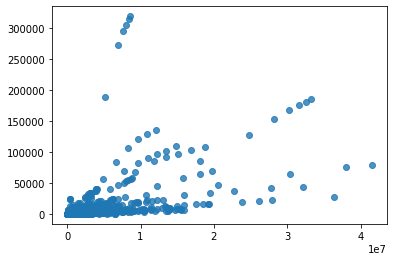

In [35]:
sns.regplot(x="views",y="dislikes",data=videos)

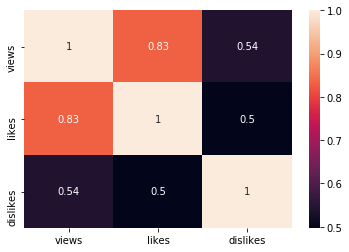

In [34]:
#heat map 

cor_d=videos[["views",'likes','dislikes']]
sns.heatmap(cor_d.corr(),annot=True)   #annot for seeing vales in heat map 

# Emojis analysis 



In [36]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [38]:
!pip install emoji

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=f94026d2e4289e69ac76c4cf53055c19044bbb8cc68f18d589bc76f04ead92af
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4e\bf\6b\2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji


In [39]:
import emoji

In [40]:
comments["comment_text"].dropna(inplace=True)  #removing Na

In [41]:
len(comments)

691400

##### Every emoji has a Unicode associated with it 
     '\U0001F600' is a unicode for 😀

In [42]:
comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI]   #this code extract the emoji from comment 

['😉']

In [45]:
#we creat a string in which we extract all emojis
str=" "
for i in comments["comment_text"]:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list :
        str=str+ele

In [46]:
print(str)

 ‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊

In [47]:
len(str)

304746

In [49]:
#create a dictionary of having each emoji with its frequency as well

dic={i:str.count(i) for i in set(str)}
dic

{'🙄': 627,
 '🏥': 6,
 '🗒': 3,
 '🎐': 4,
 '🏌': 7,
 '🛀': 11,
 '🛠': 7,
 '🕜': 4,
 '⛽': 7,
 '🌮': 69,
 '🤢': 274,
 '🙃': 253,
 '😢': 2672,
 '🌨': 16,
 '😓': 280,
 '🖋': 7,
 '🇲': 430,
 '🚂': 11,
 '🙏': 1818,
 '🎆': 86,
 '🐬': 22,
 '👂': 23,
 '📂': 25,
 '📺': 14,
 '🐙': 31,
 '⏫': 4,
 '☔': 7,
 '⛷': 5,
 '🔮': 37,
 '❇': 18,
 '💭': 43,
 '👚': 9,
 '😿': 126,
 '😟': 122,
 '🌓': 5,
 '🚵': 11,
 '🚻': 12,
 '😅': 1070,
 '🙆': 96,
 '💒': 14,
 '🍈': 25,
 '〽': 8,
 '🔝': 143,
 '🐲': 28,
 '🇰': 181,
 '✖': 17,
 '👖': 31,
 '😔': 545,
 '💃': 382,
 '🔭': 8,
 '♿': 6,
 '🐅': 10,
 '🇨': 878,
 '↪': 10,
 '🈲': 5,
 '🔹': 4,
 '🎠': 23,
 '💪': 687,
 '🍤': 19,
 '🛤': 4,
 '◻': 3,
 '🍟': 43,
 '🤐': 61,
 '😳': 398,
 '🌤': 11,
 '😚': 482,
 '🍩': 61,
 '🚹': 7,
 '🦄': 391,
 '🈚': 4,
 '👄': 90,
 '💶': 32,
 '🌬': 13,
 '🏂': 9,
 '🤔': 1592,
 '🕍': 4,
 '🆎': 5,
 '👛': 14,
 '🕐': 6,
 '😜': 573,
 '🗝': 6,
 '🏛': 4,
 '🎻': 40,
 '💌': 71,
 '🔊': 56,
 '🥃': 13,
 '🐇': 28,
 '👯': 49,
 '💁': 180,
 '🙉': 43,
 '❎': 5,
 '🦐': 7,
 '🍮': 15,
 '🗾': 6,
 '🏟': 8,
 '👐': 147,
 '👲': 7,
 '🚣': 15,
 '▪': 8,
 '👒': 12,
 '🔻': 1

In [51]:
#sorting the data 

dic={k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
dic

{' ': 1,
 '🧢': 1,
 '🤬': 1,
 '🤭': 1,
 '🤪': 1,
 '♾': 1,
 '🤟': 1,
 '⚒': 2,
 '🤨': 2,
 '☦': 2,
 '⏭': 2,
 '⏺': 2,
 '🗄': 2,
 '⚗': 2,
 '🔟': 2,
 '🎏': 2,
 '🛢': 2,
 '☣': 2,
 '⏹': 2,
 '⏸': 2,
 '⚙': 2,
 '🖨': 2,
 '🖲': 2,
 '🏷': 2,
 '⏯': 2,
 '🗒': 3,
 '◻': 3,
 '🔖': 3,
 '🕹': 3,
 '🗜': 3,
 '🕳': 3,
 '🚕': 3,
 '🎎': 3,
 '➗': 3,
 '◽': 3,
 '🛣': 3,
 '⚛': 3,
 '🔳': 3,
 '🏎': 3,
 '🗂': 3,
 '◼': 3,
 '⏲': 3,
 '💹': 3,
 '☂': 3,
 '🗓': 3,
 '⏮': 3,
 '🤺': 3,
 '⛰': 3,
 '🧐': 3,
 '🖇': 3,
 '🗞': 3,
 '🗃': 3,
 '📴': 3,
 '🖌': 3,
 '🕉': 3,
 '🏮': 3,
 '🛶': 3,
 '🚏': 3,
 '🏑': 3,
 '🗳': 3,
 '☸': 3,
 '🛩': 3,
 '🎐': 4,
 '🕜': 4,
 '⏫': 4,
 '🔹': 4,
 '🛤': 4,
 '🈚': 4,
 '🕍': 4,
 '🏛': 4,
 '🥅': 4,
 '🚚': 4,
 '🏘': 4,
 'Ⓜ': 4,
 '🈸': 4,
 '🛳': 4,
 '🔏': 4,
 '🥜': 4,
 '🈷': 4,
 '🚟': 4,
 '🔚': 4,
 '🕟': 4,
 '🔲': 4,
 '🚃': 4,
 '🆔': 4,
 '🈂': 4,
 '🌥': 4,
 '🕡': 4,
 '🕒': 4,
 '🕣': 4,
 '🔗': 4,
 '🎞': 4,
 '🚜': 4,
 '⛏': 4,
 '❔': 4,
 '🏤': 4,
 '🕘': 4,
 '🦏': 4,
 '🕙': 4,
 '⏪': 4,
 '🛫': 4,
 '🕔': 4,
 '🎽': 4,
 '⏬': 4,
 '🕑': 4,
 '↖': 4,
 '🉑': 4,
 '🏧': 4,
 '🔃': 4,
 '🆚': 4,
 '☪': 4,
 

In [52]:
keys=[*dic.keys()]
values=[*dic.values()]

In [66]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df

chars    num
0      🤣   2279
1      🏼   2549
2      😢   2672
3      💙   2831
4      👌   3112
5      😬   3381
6      💜   3429
7      🏻   3438
8      😊   3596
9      ♥   4909
10     💕   5147
11     💖   5359
12     👍   5476
13     😘   5545
14     👏   5719
15     😭   8398
16     🔥   8694
17     ❤  31119
18     😍  33453
19     😂  36987

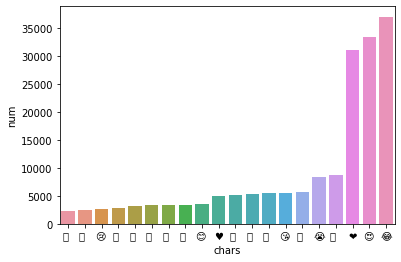

In [65]:
sns.barplot(df["chars"],df["num"])


# END